In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import load_iris
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

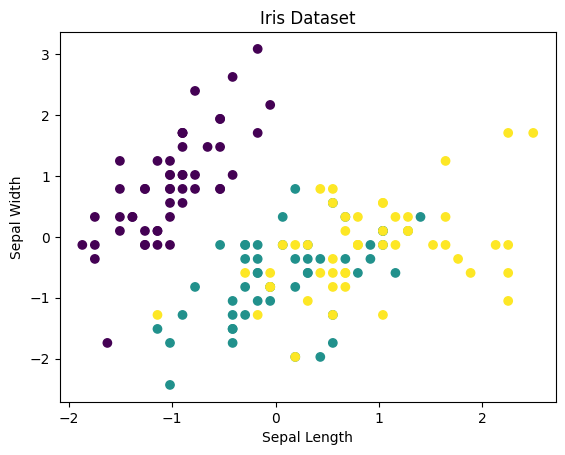

In [4]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)



In [6]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [7]:
y_pred = logreg.predict(X_test)


In [9]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


In [11]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


In [13]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

y_pred = model.predict(X_test)
y_pred_class = tf.argmax(y_pred, axis=1)

print('Accuracy:', tf.reduce_mean(tf.cast(tf.equal(y_pred_class, y_test), tf.float32)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Accuracy: tf.Tensor(0.96666664, shape=(), dtype=float32)


OR

In [17]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print accuracy score
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_classes):.2f}')


Epoch 1/50


C:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.3958 - loss: 1.2420 - val_accuracy: 0.2917 - val_loss: 1.1676
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3646 - loss: 1.2079 - val_accuracy: 0.2917 - val_loss: 1.1441
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3919 - loss: 1.1681 - val_accuracy: 0.2917 - val_loss: 1.1222
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3568 - loss: 1.1450 - val_accuracy: 0.3750 - val_loss: 1.1009
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3268 - loss: 1.1298 - val_accuracy: 0.3750 - val_loss: 1.0805
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4766 - loss: 1.0671 - val_accuracy: 0.4583 - val_loss: 1.0616
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5508 - loss: 1.0457 - val_accuracy: 0.4583 - val_loss: 1.0439
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6406 - loss: 0.9985 - val_accuracy: 0.4583 - val_loss: 1.0273
Epoch 9/50
